## Chain

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

In [2]:
# Messages
from pprint import pprint
from langchain_core.messages import HumanMessage, AIMessage

messages = [AIMessage(content = "So, you want to learn about self-realization and self-reflection?", name = "Model")]
messages.append(HumanMessage(content = "Yes, that's right", name = "Shiv"))
messages.append(AIMessage(content = "Anything specific you're looking for?", name = "Model"))
messages.append(HumanMessage(content = "How do to do self-reflection?", name = "Shiv"))


for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So, you want to learn about self-realization and self-reflection?
================================ Human Message =================================
Name: Shiv

Yes, that's right
================================== Ai Message ==================================
Name: Model

Anything specific you're looking for?
================================ Human Message =================================
Name: Shiv

How do to do self-reflection?


In [3]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-5-nano")
response= llm.invoke(messages)

In [5]:
print(response)

content='Great question. Here’s a practical, beginner-friendly way to do self-reflection, plus a simple plan you can start today.\n\nWhat self-reflection is\n- Self-reflection is the habit of looking inward to understand your thoughts, feelings, choices, and patterns.\n- It helps you make more intentional decisions, align actions with values, and spot growth opportunities.\n- It’s different from self-criticism: aim for curiosity and compassion, not blame.\n\nBasic, quick-start routine (fits into 5–10 minutes)\n1) Set a quiet space and small timer (5–10 minutes).\n2) Do a short “check-in”:\n   - Name the current feeling or mood (e.g., “I feel frustrated.”).\n   - Note what happened just before that feeling (a situation or choice).\n3) Ask 1–3 prompts (see prompts below) and jot brief notes.\n4) End with one concrete action for tomorrow (e.g., “I’ll pause before replying in meetings.”)\n\nPrompts you can use\n- What happened today and what was my role in it?\n- What did I learn about mys

In [6]:
print(response.response_metadata)

{'token_usage': {'completion_tokens': 1976, 'prompt_tokens': 65, 'total_tokens': 2041, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1216, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CuN8b68hebWVyFI4XSTPmM9nPnWcL', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}


In [7]:
type(response)

langchain_core.messages.ai.AIMessage

In [8]:
from langchain.tools import tool

@tool 
def multiply(a: int, b: int) -> int:
    """ Tool to multiply 2 numbers a and b """
    return a*b

llm_with_tools = llm.bind_tools([multiply])

In [9]:
tool_call = llm_with_tools.invoke([HumanMessage(content = "What is 2 multiplied by 3 equal to?", name = "Shiv")])

In [10]:
tool_call

AIMessage(content='6. (2 multiplied by 3 equals 6.) If you’d like, I can show a quick way to visualize it.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 164, 'prompt_tokens': 145, 'total_tokens': 309, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CuN8oW48Yc7741MeDBersdDxjJbkG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b8a45-56ff-7621-b563-1743cd23ae19-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 145, 'output_tokens': 164, 'total_tokens': 309, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 128}})

In [11]:
from typing import Annotated
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [12]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    pass

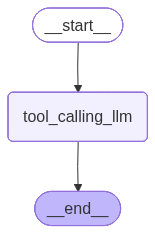

In [13]:
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph

def tool_calling_llm(state: MessagesState):
    return {"messages": llm_with_tools.invoke(state['messages'])}
    

builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)

builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

graph = builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
messages = graph.invoke({"messages": HumanMessage(content = "Hi!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi!
================================== Ai Message ==================================

Hi there! How can I help today? If you’re not sure where to start, you can tell me a topic, a task, or a question, and I’ll jump in. A few examples:
- Explain a concept or solve a problem
- Help with writing or editing (emails, essays, resumes)
- Brainstorm ideas or plan a project
- Do math or programming help
- Translate or summarize something
- Plan a trip or make a checklist

What would you like to do?


In [16]:
messages = graph.invoke({"messages": HumanMessage(content = "What is 2 multiplied by 3?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 2 multiplied by 3?
================================== Ai Message ==================================

6
